Preface:
Throughout my schooling years, I've always been fascinated by the way data can narrate a compelling story. In my middle school lessons, we were taught to generalise a linear relationship with data with formula y=mx+b, where m denotes the slope and b the y-intercept. To find the parameters to this formila ypically involved selecting two points, often the first and last data points given, to calculate the slope and y-intercept. However, I've often pondered the accuracy of this approach and sought out alternative methods.

After conducting thorough research, I came across the idea of delving into the fundamentals of linear algebra, particularly utilizing matrices and single value decomposition (SVD), as a promising avenue to achieve a more precise estimation of these parameters. Additionally, I became fascinated by the potential of employing machine learning techniques, specifically supervised learning, to develop and refine a model that closely aligns with the observed data points. This exploration aims to delve into these concepts, elucidating their underlying principles, and showcasing the efficacy of supervised machine learning in identifying an optimal model.

Methodology:
The data that will be used is developed randomly by the PyTorch library, where a tensor with 50 x values is created. Using the torch.normal method, 50 corresponding y-values will be created with input parameters m = 5, and b = 10 with standard deviation of 0.2 at random (The parameters have been chosen at random). With our values set, linear algebra concepts will be employed to determine the most accurate estimators for our parameters m and b. Furthermore a 4-step machine learning process is employed to find estimates for our parameters.

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#we will create a random tensor to be the x values of the dataset of 50 values 
random_x_tensor = torch.FloatTensor(1, 50).uniform_(-1, 1) * 100
#save the random tensor we have created in a new tensor called x_tensor
x_tensor = random_x_tensor
x_array = x_tensor.numpy()

#create the y_tensor
y_tensor = 5*x_tensor + 10 + torch.normal(mean=torch.zeros(50), std=30)
y_array = y_tensor.numpy()

x_array = x_array.transpose()
y_array = y_array.transpose()
print(x_array)
print(y_array)

[[  3.1742215 ]
 [ 42.576694  ]
 [ 83.99989   ]
 [ -2.3769975 ]
 [-69.30779   ]
 [-31.325722  ]
 [ 70.80703   ]
 [ 25.829351  ]
 [-94.861664  ]
 [ 96.45033   ]
 [-10.050858  ]
 [  4.698324  ]
 [-16.854525  ]
 [ 97.213554  ]
 [ 35.556637  ]
 [  3.1067133 ]
 [-46.681427  ]
 [ 41.002335  ]
 [-33.071125  ]
 [-96.03352   ]
 [-89.839745  ]
 [-34.509254  ]
 [ -1.7142057 ]
 [-96.69068   ]
 [ 63.740242  ]
 [ 83.19248   ]
 [-68.092606  ]
 [ -8.6554165 ]
 [-40.886845  ]
 [-20.257568  ]
 [ 67.77059   ]
 [ 39.061653  ]
 [  5.1627636 ]
 [-18.830633  ]
 [ 76.39184   ]
 [-78.648056  ]
 [ 74.069145  ]
 [-70.93065   ]
 [ 81.09474   ]
 [  0.36058426]
 [ 69.21315   ]
 [-10.726679  ]
 [-71.149155  ]
 [-34.446083  ]
 [ 48.3935    ]
 [-38.41101   ]
 [ 46.231674  ]
 [-30.981041  ]
 [ 35.222305  ]
 [-45.02057   ]]
[[  51.335518 ]
 [ 217.61725  ]
 [ 450.22702  ]
 [ -29.252214 ]
 [-304.1321   ]
 [-127.50908  ]
 [ 407.56302  ]
 [ 196.92291  ]
 [-473.26782  ]
 [ 527.3382   ]
 [ -61.339455 ]
 [  50.398346 ]
 [-103.

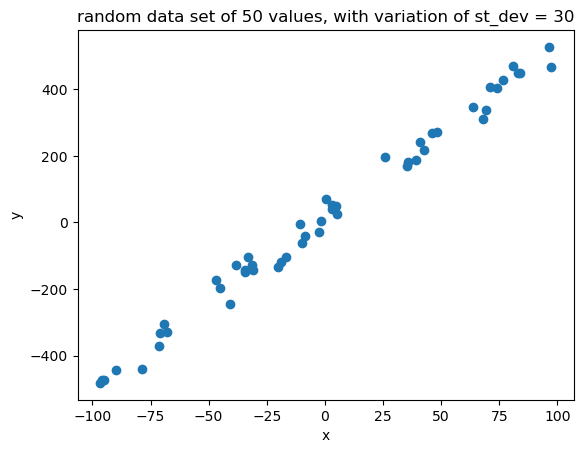

In [3]:
#Plot the relationship betweeen x and y for a visual representation
fig, ax = plt.subplots()
plt.title("random data set of 50 values, with variation of st_dev = 30")
plt.xlabel("x")
plt.ylabel("y")
ax.scatter(x_tensor, y_tensor)

Linear Algebra:
We'll use linear algebra to find the best predictors for our parameters, m and b. We'll use a method called singular value decomposition, which relies on two main ideas: matrix algebra and decomposition. We'll set up matrices so that y (output) equals x (input) times p (parameters). Our goal is to solve for p.

<img src = "matrix.png" width="150">

By using the inverse of matrix x, we can separate out the matrix p containing our parameters. So, to find the values of m and b in matrix p, we multiply the inverse of x by y. Here's an example of how the matrices are arranged in the system.

Here is an example with values to present the relationship between the matrices.

<img src = "1initial.png" width="205">

In the matrix multiplication system, the first column of x is multiplied by m, and the second column is multiplied by b. For instance, the first row multiplication results in 2 = 43m + b, demonstrating that the matrix multiplication correctly represents the system to find m and b. Now, let's perform the inverse multiplication of x with y to isolate the parameter matrix p.

<img src = "1inverse.png" width="205">





To compute the inverse of matrix x, we are unable to employ the concept of eigendecomposition as that concept can only be applied to square matrices. However, the solution to this barrier is the Moore-Penrose Pseuodoinverse. The following notation will walk through the pseudoinverse. 

<img src = "pseudo.png" width="500">

Before we get into calculating the pseudoinverse, lets spend some time grasping the concept of Singular Value Decomposition (SVD) and what it does. As the pseudoinverse is calculated, it uses components of the SVD of the matrix X.

In essence, SVD provides a way to decompose a matrix into simpler components, which facilitates the calculation of the pseudoinverse. The steps to caluclate the pseudoinverse are:
- Decompose the matrix into its SVD: U, V, D
- Construct the Moore-Penrose Pseudoinverse by finding V^+ and D transposed

SVD is similar to Eigendecomposition in the manner in which it takes a large matrix and breaks it down into 3 smaller matrices, U, V, D.
In essence it breaks the matrices into:
- Important Directions (Singular Vectors): It identifies the directions in which the most important information in the matrix is concentrated. 
- Importance of Directions (Singular Values): It determines how important each of these directions is. This importance is quantified by singular values.


- U and V are the singular vectors which are orthornmal matrices which contain vectors which are linearly independent to each other. 




In [4]:
#We need to add a column of ones to the x_array so the matrix multiplication of the system of linear equations can be satisfied.

#this gives us 1 row of ones, but we need one column so we will transpose and concatenate it to the x_array
x_array = np.insert(x_array, x_array.shape[1], 1, axis=1)
print(x_array)
U, d, VT = np.linalg.svd(x_array)

print(U)
print(d)
print(VT)

[[  3.1742215    1.        ]
 [ 42.576694     1.        ]
 [ 83.99989      1.        ]
 [ -2.3769975    1.        ]
 [-69.30779      1.        ]
 [-31.325722     1.        ]
 [ 70.80703      1.        ]
 [ 25.829351     1.        ]
 [-94.861664     1.        ]
 [ 96.45033      1.        ]
 [-10.050858     1.        ]
 [  4.698324     1.        ]
 [-16.854525     1.        ]
 [ 97.213554     1.        ]
 [ 35.556637     1.        ]
 [  3.1067133    1.        ]
 [-46.681427     1.        ]
 [ 41.002335     1.        ]
 [-33.071125     1.        ]
 [-96.03352      1.        ]
 [-89.839745     1.        ]
 [-34.509254     1.        ]
 [ -1.7142057    1.        ]
 [-96.69068      1.        ]
 [ 63.740242     1.        ]
 [ 83.19248      1.        ]
 [-68.092606     1.        ]
 [ -8.6554165    1.        ]
 [-40.886845     1.        ]
 [-20.257568     1.        ]
 [ 67.77059      1.        ]
 [ 39.061653     1.        ]
 [  5.1627636    1.        ]
 [-18.830633     1.        ]
 [ 76.39184   

Now we have V, D and U. We need to find U transposed and D plus.
U transposed is simple to find by using the numpy method .transpose()
However, to find D plus we need to compute the reciprocal of all the non-zero elements transposed.
Since D is a matrix with values of 1 row, we need to diagonalise, invert and then concatenate it with columns of zeros so it has the same shape as X transposed for V * Dplus * UT matrix multiplication to be possible as the number of columns in D plus need to equal the number of rows in X transposed.


UT = U.transpose()

d_diag = np.diag(d)

d_inv = np.linalg.inv(d_diag)

d_plus = np.concatenate((d_inv, np.array([[0, 0]  *25 ]).T), axis=1)
print(d_plus)


Now we have all the elements to calculate the Moore-penrose pseudoinverse which is through
V, Dplus and UT.


In [5]:
inverse = np.linalg.pinv(x_array)
print(inverse)

[[ 1.58628773e-05  2.66388321e-04  5.29761775e-04 -1.94324075e-05
  -4.44986101e-04 -2.03491712e-04  4.45879996e-04  1.59906791e-04
  -6.07460563e-04  6.08923147e-04 -6.82236860e-05  2.55532996e-05
  -1.11482186e-04  6.13775745e-04  2.21754002e-04  1.54336522e-05
  -3.01125052e-04  2.56378349e-04 -2.14589192e-04 -6.14911318e-04
  -5.75530634e-04 -2.23732990e-04 -1.52183029e-05 -6.19089638e-04
   4.00948571e-04  5.24628151e-04 -4.37259790e-04 -5.93513214e-05
  -2.64282426e-04 -1.33119131e-04  4.26573999e-04  2.44039300e-04
   2.85062561e-05 -1.24046521e-04  4.81388881e-04 -5.04372583e-04
   4.66620928e-04 -4.55304398e-04  5.11290506e-04 -2.02654951e-06
   4.35745984e-04 -7.25206410e-05 -4.56693699e-04 -2.23331343e-04
   3.03372217e-04 -2.48540804e-04  2.89627089e-04 -2.01300194e-04
   2.19628273e-04 -2.90565134e-04]
 [ 1.99892242e-02  1.98190380e-02  1.96401235e-02  2.00132020e-02
   2.03022882e-02  2.01382358e-02  1.96971055e-02  1.98913720e-02
   2.04126611e-02  1.95863489e-02  2.0046

In [6]:
parameters = np.dot(inverse, y_array)


In [7]:
m  = parameters[0]
b = parameters[1]
print('slope is: ',m)
print('y intercept is: ',b)

slope is:  [5.1128]
y intercept is:  [17.19009]


To better visualise the accuracy of the parameters, lets plot the data points and the equation of the line.

In [8]:
def regression(x, m, b):
    y = m*x + b
    return y

def plot(x, y, m, b):
    fig, ax = plt.subplots()

    ax.scatter(x, y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, m, b).detach().item()
    y_max = regression(x_max, m, b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])
    
    _ = ax.plot([x_min, x_max], [y_min, y_max])

/var/folders/28/ngv_x0d13y1gghqldrf1l_yw0000gn/T/ipykernel_46917/4266050676.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  m = torch.tensor([parameters[0]])


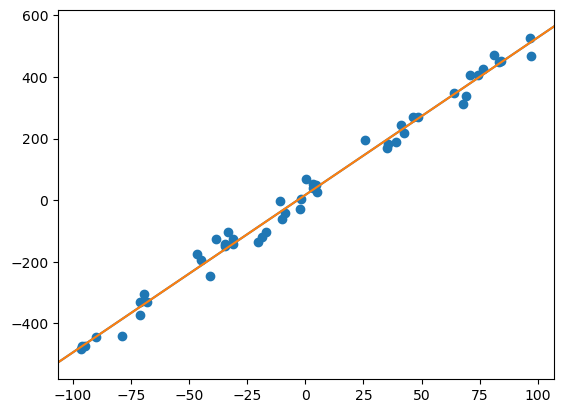

In [9]:
m = torch.tensor([parameters[0]])
b = torch.tensor([parameters[1]])
plot(x_tensor, y_tensor, m,b)

Here, we observe that our approach yields reasonably accurate results. Thus, using this method, we can determine the most precise estimator for a line of best fit in a linear relationship between two variables. With this information, we can employ calculus in machine learning to assist in finding the optimal line of best fit through iterative adjustments. Upon completion of our exploration, we will assess the model's accuracy.

We'll utilize gradient descent as our tool in the Reinforcement Machine Learning method to refine the parameters m and b. In simple terms, reinforcement learning trains a model to make decisions by finding the best possible outcome. This involves a trial-and-error approach until the optimal result is achieved, which, in this case, means predicting the most accurate values for m and b in the equation of a line.

The process involves five steps:

Initializing Parameters: Start by assigning random values to the parameters we're trying to predict.

Forward Propagation: Use these parameters to predict the output values.

Calculate Cost: Compare the predicted output values with the actual ones. The cost function gauges how much the predictions deviate from the actual values.

Backpropagation (computing the gradient of cost): Find the partial derivatives of the cost function concerning each parameter using the chain rule of calculus.

Parameter Update: Employ gradient descent to adjust the parameter values. Modify the parameters in a way that minimizes the cost function by subtracting a fraction of the gradient from them.

This process iterates until the cost function reaches a minimum, or until it converges satisfactorily. Through this iterative process, the model gradually learns the optimal parameters to make precise predictions for m and b.

<img src = "ml steps.png" width="500">


In [10]:
#lets have a look at our x and y tensors
x_tensor


tensor([[  3.1742,  42.5767,  83.9999,  -2.3770, -69.3078, -31.3257,  70.8070,
          25.8294, -94.8617,  96.4503, -10.0509,   4.6983, -16.8545,  97.2136,
          35.5566,   3.1067, -46.6814,  41.0023, -33.0711, -96.0335, -89.8397,
         -34.5093,  -1.7142, -96.6907,  63.7402,  83.1925, -68.0926,  -8.6554,
         -40.8868, -20.2576,  67.7706,  39.0617,   5.1628, -18.8306,  76.3918,
         -78.6481,  74.0691, -70.9306,  81.0947,   0.3606,  69.2132, -10.7267,
         -71.1492, -34.4461,  48.3935, -38.4110,  46.2317, -30.9810,  35.2223,
         -45.0206]])

In [11]:
y_tensor


tensor([[  51.3355,  217.6172,  450.2270,  -29.2522, -304.1321, -127.5091,
          407.5630,  196.9229, -473.2678,  527.3382,  -61.3395,   50.3983,
         -103.1504,  467.4587,  182.8553,   40.6241, -173.6096,  242.4164,
         -104.6192, -472.5103, -444.7153, -142.7562,    4.5056, -482.2288,
          346.5857,  449.1698, -329.1563,  -40.4961, -246.5539, -134.7291,
          312.2440,  188.6800,   25.4906, -118.3128,  427.3398, -441.1177,
          404.9953, -331.1554,  471.5061,   69.4756,  338.6842,   -3.2910,
         -372.6958, -147.6758,  270.3474, -126.7541,  269.4669, -143.0415,
          169.5143, -195.5268]])

Before we start machine learning, we will manually compute each step of the process to visualise each step of how the model learns.
Note that the Pytorch package will be used to implement the machine learning process.

In [12]:
#we treat m and b as tensors as we will be treating them as scalar tensors to conduct operations on the vector tensors on x_tensor
m = torch.tensor([10.0])
m

tensor([10.])

In [13]:
b = torch.tensor([15.0])
b

tensor([15.])

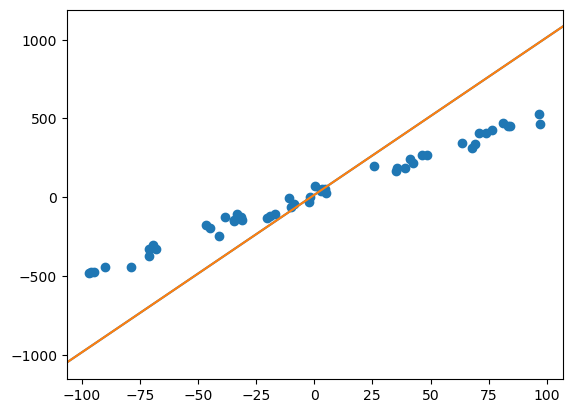

In [14]:
plot(x_tensor, y_tensor, m, b)

In the image above we can see the 

Step 1: Using random values for m and b.
For this example lets use 10 for m and 15 for b.

Before we begin step 2, lets visualise what the current line of best fit appears to be like, before we conduct one full round of steps to improve the current best fit line in an incremental manner. We can use our plot function that we created to visualise it

Here, we can see the line of best fit is highly innacurate, as we took the negative of the initial parameters to accentuate the ability of the ability for the software and adapt the model.


Step 2: Do a forward pass (calculate the y value using the random values for parameters we picked).
Using m = -5 and b = -10 for the 50 x values to create an array of predicted y values called y_hat

In [15]:
#implementing Step 2
#we treat m and b as tensors as we will be treating them as scalar tensors to conduct operations on the vector tensors on x_tensor
m = torch.tensor([10.0]).requires_grad_()
#We use the requires_grad_() method which we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value.
m

tensor([10.], requires_grad=True)

In [16]:
b = torch.tensor([15.0]).requires_grad_()
b

tensor([15.], requires_grad=True)

In [17]:
#y_hat is our predicted y values using our intial parameters
y_hat = regression(x_tensor,m,b)
#lets see the 50 values that we have produced of our predicted y_values
y_hat

tensor([[  46.7422,  440.7669,  854.9989,   -8.7700, -678.0779, -298.2572,
          723.0703,  273.2935, -933.6166,  979.5033,  -85.5086,   61.9832,
         -153.5452,  987.1356,  370.5664,   46.0671, -451.8143,  425.0233,
         -315.7112, -945.3352, -883.3975, -330.0925,   -2.1421, -951.9068,
          652.4024,  846.9248, -665.9260,  -71.5542, -393.8684, -187.5757,
          692.7059,  405.6165,   66.6276, -173.3063,  778.9184, -771.4806,
          755.6915, -694.3065,  825.9474,   18.6058,  707.1315,  -92.2668,
         -696.4916, -329.4608,  498.9350, -369.1101,  477.3167, -294.8104,
          367.2231, -435.2057]], grad_fn=<AddBackward0>)

Step 3: Compare the predcited y values with the actual y values to find the cost value

A method of finding the difference or distance from the predicted y's and actual y's will be using mean squared error. There are many other metrics to find the distance or cost however mean squared error is especially useful because of the formula of the metric. It takes the difference between the predicted and the actual y value and squares it. It computes that for all of the corresponding pairs and takes the mean. This way, those predictions that are further away from the actual y values are penalised more since the values are squared. 
The equation is:

 <img src = "MSE.png" width="200">

 However, since we have negative values in our model, we will have to use mean absolute error. This is because we need to take the absolute value of the difference between the actual y and predicted y.

 <img src = "MAE.jpg" width="400">


In [18]:
MAE = torch.nn.L1Loss()
cost = MAE(y_hat, y_tensor)
cost

tensor(230.9056, grad_fn=<MeanBackward0>)

Step 4: Calcualate the gradient of cost with respect to the parameters m & b
Here, we will use the automatic differentiation function of pytorch to find the partial derivative it calculates for each parameter

In [19]:
cost.backward()

The backward() method in Pytorch is used to calculate the gradient during the backward pass.  If we do not call this backward() method then gradients are not calculated for the tensors with respect to each parameter.

In [20]:
m.grad

tensor([46.8570])

In [21]:
b.grad

tensor([-0.0800])

Here, we can see the gradients for both m and b have real values indicating that we need to descend these gradients.

Step #5: Use gradient descent to change the values.
It requires both our parameters and a hyperparameter called the learning rate which helps to calculate the step size.
The step size is by how much should the value of m and b must be changed by. It is calculated by 

step size = learning rate * slope

Where slope is b.grad and m.grad. So if the slope is positive it will increase the value, and if it is positive it will decrease the value.


In [22]:
optimiser = torch.optim.SGD([m, b], lr=0.01)

In [23]:
optimiser.step()
#this performs a single optimisation step. So it adjusts both parameters (m and b) according to our learning rate. It performs a single step.


In [24]:
#now lets confirm the parameters have been adjusted
m


tensor([9.5314], requires_grad=True)

In [25]:
b

tensor([15.0008], requires_grad=True)

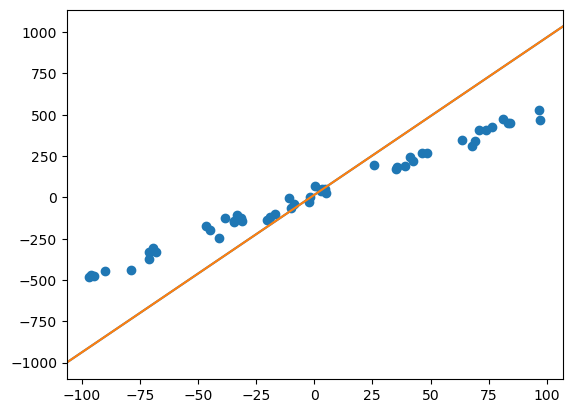

In [26]:
plot(x_tensor, y_tensor,m,b)

Here, we are seeing improvement now that the values for m and b are positive. Now we will continue the steps in a function to see the eventual progression and learning that occurs through each learning step. 

In [27]:
epochs = 500
for epoch in range(epochs):
    
    optimiser.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x_tensor, m, b) # Step 2
    cost = MAE(y_tensor,yhat) # Step 3
    
    cost.backward() # Step 4
    optimiser.step() # Step 5
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % cost.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 209, m grad 46.9, b grad -0.08
Epoch 1, cost 187, m grad 46.9, b grad -0.08
Epoch 2, cost 165, m grad 46.9, b grad -0.08
Epoch 3, cost 143, m grad 46.7, b grad -0.12
Epoch 4, cost 121, m grad 46.7, b grad -0.12
Epoch 5, cost 99.8, m grad 45.3, b grad -0.08
Epoch 6, cost 80, m grad 42.9, b grad -0.04
Epoch 7, cost 61.8, m grad 40.9, b grad 0.04
Epoch 8, cost 45.1, m grad 40.8, b grad 0.08
Epoch 9, cost 30.1, m grad 28.1, b grad -0.04
Epoch 10, cost 24.2, m grad 10.1, b grad -0.2
Epoch 11, cost 23.9, m grad -7.04, b grad -0.16
Epoch 12, cost 23.9, m grad 4.21, b grad -0.28
Epoch 13, cost 23.8, m grad -3.45, b grad -0.2
Epoch 14, cost 23.9, m grad 4.21, b grad -0.28
Epoch 15, cost 23.8, m grad -3.45, b grad -0.2
Epoch 16, cost 23.8, m grad 4.21, b grad -0.28
Epoch 17, cost 23.8, m grad -3.45, b grad -0.2
Epoch 18, cost 23.8, m grad 4.21, b grad -0.28
Epoch 19, cost 23.9, m grad -7.04, b grad -0.16
Epoch 20, cost 23.9, m grad 7.57, b grad -0.24
Epoch 21, cost 23.9, m grad -7.

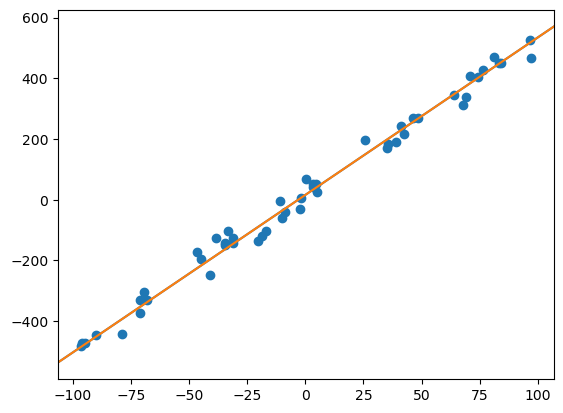

In [28]:
plot(x_tensor,y_tensor,m,b)

In [29]:
m

tensor([5.1917], requires_grad=True)

In [30]:
b

tensor([15.9284], requires_grad=True)

The method to evaluate the accuracy of the line of best fit is by calcuting residuals. First we will calculate the residuals for the method used for linear algebra, then calculus.

Residuals are Residual = actual y value − predicted y value. However in this case the actual y value will be the y_tensor, and the predicted y_value will be the result y_value determined by the parameters that we predicted for each method. It is basically taking the mean absolute error.

In [31]:
#residuals for the parameters predicted using linear algebra
actual_y = y_tensor

#using the m and b values that we calculated using linear algebra to create the predicted y tensor
lin_m = float(parameters[0])
lin_b = float(parameters[1])

predicted_lin_y = lin_m * x_tensor + lin_b
#we can use the MAE function we created previously
lin_residuals = MAE(predicted_lin_y,actual_y)
print(lin_residuals)

tensor(23.6199)


In [32]:
#residuals for the parameters predicted using calculus
calc_m = float(m)
calc_b = float(b)

predicted_calc_y = calc_m * x_tensor + calc_b
calc_residuals = MAE(predicted_calc_y, actual_y)
print(calc_residuals)


tensor(23.7924)


Limitations or extentions of the exploration.
- The number of data points (does the number of data points impact the accuracy of predicting the parameters)
- The starting point values for the parameters in machine learning. How does picking a certain value for the parameters impact the rate at which or ability to learn. Is the cost function still able to reach a global mimima?